In [1]:
from google.colab import drive

# This will prompt you to log in to your Google account to authorize access to Google Drive.
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 5.3 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
from joblib import load, dump
import shap
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projet 7/API/X_test50_withIndex.csv')
data_woIndex = data.drop(columns=['SK_ID_CURR'])

In [5]:
 best_model = load('/content/drive/MyDrive/Colab Notebooks/Projet 7/API/model_best_LGBM.sav')

In [6]:
row_to_send = data_woIndex.iloc[20].to_dict()
df = pd.DataFrame([row_to_send])

In [7]:
prediction = best_model.predict_proba(df)[:,1]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [8]:
prediction

array([0.4829544])

In [9]:
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(data_woIndex)

# Création d'un dictionnaire pour stocker les valeurs SHAP et l'expected_value
shap_data = {
    'shap_values': shap_values,
    'expected_value': explainer.expected_value
}

# Sauvegarde des shap_values
dump(shap_data, '/content/drive/MyDrive/Colab Notebooks/Projet 7/API/shap_data.joblib')


/usr/local/lib/python3.10/dist-packages/shap/explainers/_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


['/content/drive/MyDrive/Colab Notebooks/Projet 7/API/shap_data.joblib']

In [10]:
shap_data

{'shap_values': array([[ 2.94350793e-01,  3.80851427e-01,  1.30191171e-02, ...,
         -8.22379420e-05,  6.21567126e-03,  4.62732483e-03],
        [-4.95539665e-02, -1.63116962e-01,  1.40841563e-02, ...,
          8.76115718e-04,  9.68450871e-03,  9.27779905e-03],
        [ 1.27127414e-01,  1.30635345e-01,  1.21988367e-02, ...,
         -1.14944653e-04,  6.46145061e-03,  7.24817895e-03],
        ...,
        [-3.55439680e-01, -2.99659052e-01, -7.01205279e-02, ...,
         -1.71687870e-04, -4.98434932e-05, -7.97926725e-03],
        [-3.18759343e-01, -3.36449828e-01, -5.75098429e-02, ...,
         -2.13117749e-04, -1.02993572e-02, -1.66893889e-02],
        [-2.93290212e-02, -2.06379823e-01,  2.19499785e-02, ...,
         -4.55715131e-04, -5.44306962e-03, -4.13109582e-03]]),
 'expected_value': 0.26107921395930483}

In [11]:
# Expliquez les prédictions du meilleur modele
explainer = shap.Explainer(best_model)
shap_values = explainer(data_woIndex)

# Sauvegarde des shap_values
dump(shap_values, '/content/drive/MyDrive/Colab Notebooks/Projet 7/API/shap_values.joblib')

['/content/drive/MyDrive/Colab Notebooks/Projet 7/API/shap_values.joblib']

In [12]:
# Extraire les noms des colonnes des 5 premières variables
top_features = data_woIndex.columns[np.argsort(np.abs(shap_values.values).mean(0))][::-1][:5]
top_features

Index(['ext_source_2_ext_source_3_days_birth', 'ext_source_2_ext_source_3',
       'code_gender_f', 'name_education_type_higher_education',
       'name_education_type_secondary__secondary_special'],
      dtype='object')

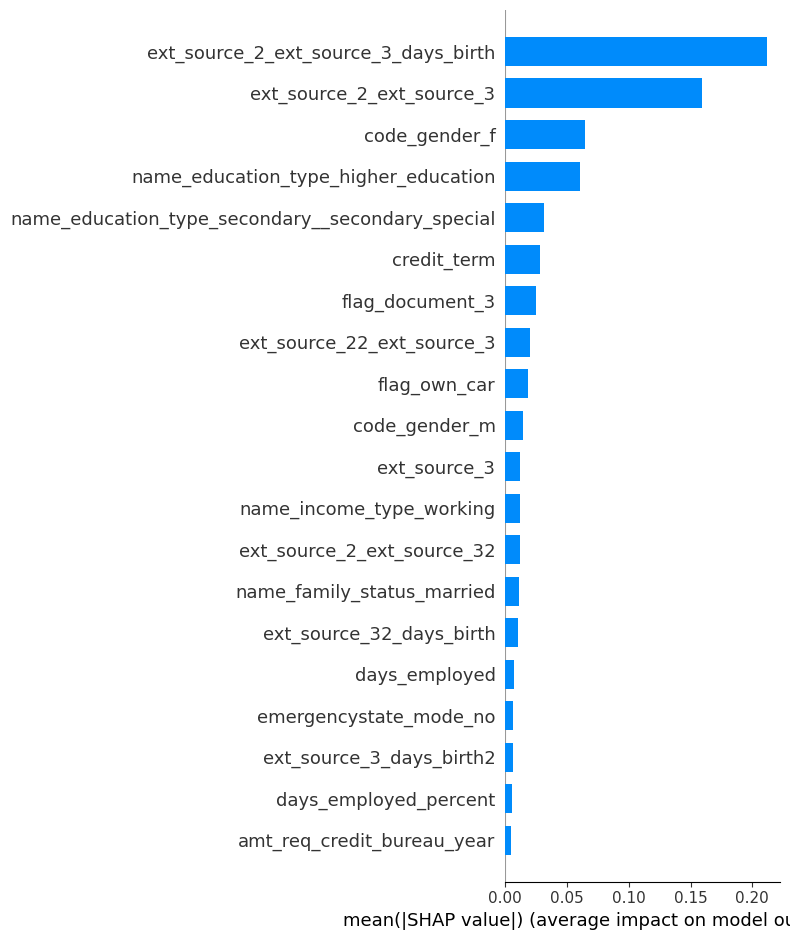

In [13]:
# Affichez l'importance des variables
shap.summary_plot(shap_values, data_woIndex, plot_type="bar")

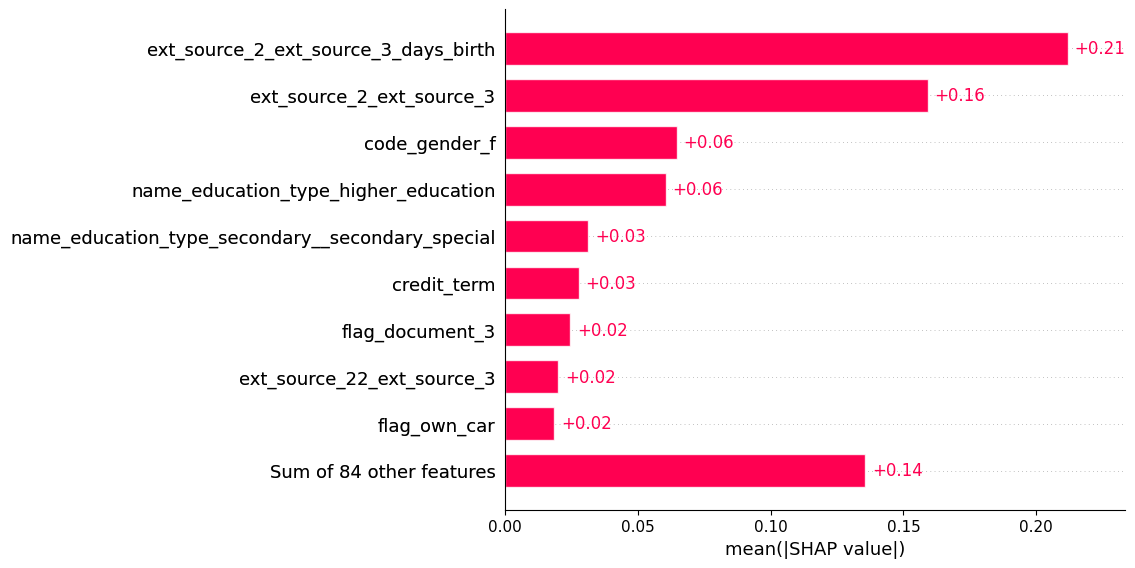

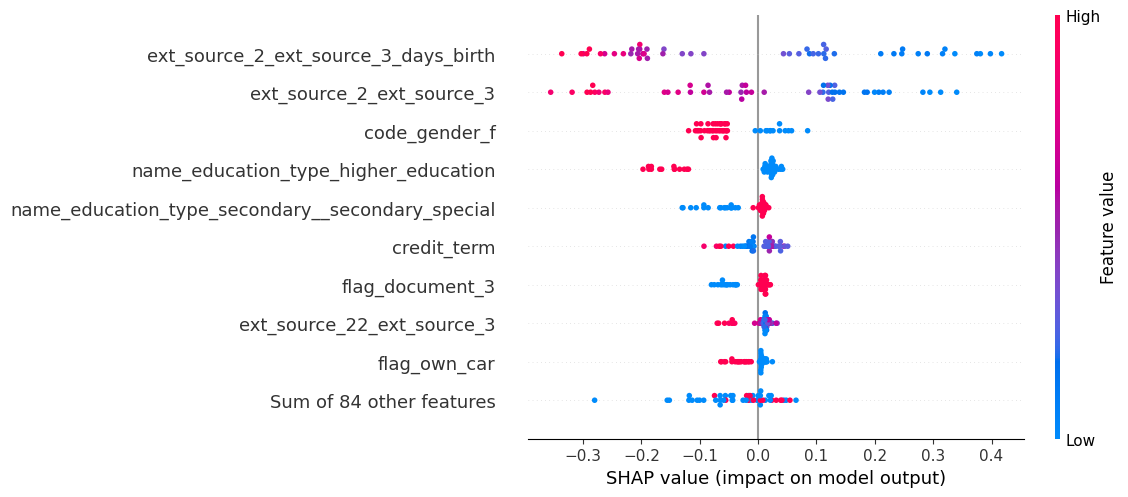

In [14]:
    shap.plots.bar(shap_values)
    shap.plots.beeswarm(shap_values)

In [15]:
shap.initjs()

#shap.force_plot(shap_values.base_values[0], shap_values.values[0], data_woIndex.iloc[20])
shap.force_plot(shap_values.base_values[0], shap_values.values[0], df)

# je ne sais plus comment interpreter ce graphe ? -0.51 ?? alors que nous sommes en presence d'un mauvais payeur avec 0.6 de proba de ne pas rembourser...


In [16]:
data_woIndex.iloc[0]

ext_source_2_ext_source_3               3.189398e-04
ext_source_2_ext_source_3_days_birth    4.240942e+00
ext_source_22_ext_source_3              1.929249e-04
ext_source_2_ext_source_32              1.681658e-07
ext_source_2                            6.048943e-01
                                            ...     
name_income_type_working                0.000000e+00
region_rating_client                    2.000000e+00
region_rating_client_w_city             2.000000e+00
days_employed_percent                  -5.730616e-02
days_employed                          -7.620000e+02
Name: 0, Length: 93, dtype: float64

In [17]:
df

,ext_source_2_ext_source_3,ext_source_2_ext_source_3_days_birth,ext_source_22_ext_source_3,ext_source_2_ext_source_32,ext_source_2,ext_source_2_days_birth,ext_source_3,ext_source_3_days_birth,ext_source_22,ext_source_22_days_birth,...,name_education_type_secondary__secondary_special,reg_city_not_work_city,days_id_publish,code_gender_m,days_last_phone_change,name_income_type_working,region_rating_client,region_rating_client_w_city,days_employed_percent,days_employed
0,0.183079,4412.395994,0.062618,0.097998,0.342028,8243.212715,0.535276,12900.692913,0.116983,2819.408152,...,0.0,0.0,-4264.0,0.0,-867.0,0.0,2.0,2.0,-0.118733,-1648.0


In [18]:
# Créer un graphique shap.force_plot
shap.initjs()
force_plot = shap.force_plot(shap_values.base_values[0], shap_values.values[0], data_woIndex.iloc[20])

# Afficher le graphique avec Matplotlib
plt.figure(figsize=(10, 6))
shap.force_plot(shap_values.base_values[0], shap_values.values[0], data_woIndex.iloc[20])
plt.show()


<Figure size 1000x600 with 0 Axes>

In [19]:
shap_df = pd.DataFrame(shap_data['shap_values'], columns=data_woIndex.columns.tolist())
shap_df.head(5)

,ext_source_2_ext_source_3,ext_source_2_ext_source_3_days_birth,ext_source_22_ext_source_3,ext_source_2_ext_source_32,ext_source_2,ext_source_2_days_birth,ext_source_3,ext_source_3_days_birth,ext_source_22,ext_source_22_days_birth,...,name_education_type_secondary__secondary_special,reg_city_not_work_city,days_id_publish,code_gender_m,days_last_phone_change,name_income_type_working,region_rating_client,region_rating_client_w_city,days_employed_percent,days_employed
0,0.294351,0.380851,0.013019,0.023538,0.000059,0.000245,0.007430,0.002695,0.000018,0.0,...,0.008876,0.000437,0.000007,0.010048,0.000546,-0.025266,-0.000488,-0.000082,0.006216,0.004627
1,-0.049554,-0.163117,0.014084,-0.015503,0.000545,0.000255,-0.017422,-0.002894,0.000082,0.0,...,-0.053006,-0.000559,-0.001381,-0.020567,-0.000213,-0.013455,0.001197,0.000876,0.009685,0.009278
2,0.127127,0.130635,0.012199,0.013451,0.000798,-0.000191,0.016468,0.003291,0.000054,0.0,...,0.013001,-0.000659,0.000330,-0.014887,-0.003340,0.002369,-0.000499,-0.000115,0.006461,0.007248
3,-0.262527,-0.303215,-0.039999,-0.010317,0.000356,-0.001389,-0.019371,-0.008108,0.000044,0.0,...,0.002323,-0.000439,-0.000118,-0.016538,-0.000861,-0.008460,-0.000140,-0.000087,-0.008485,-0.012207
4,-0.160645,-0.202718,0.030855,-0.013058,0.001196,-0.000219,-0.019791,-0.006509,0.000036,0.0,...,0.007227,-0.001126,0.000653,0.018014,0.000904,0.002947,-0.000133,-0.000084,0.019516,0.007076


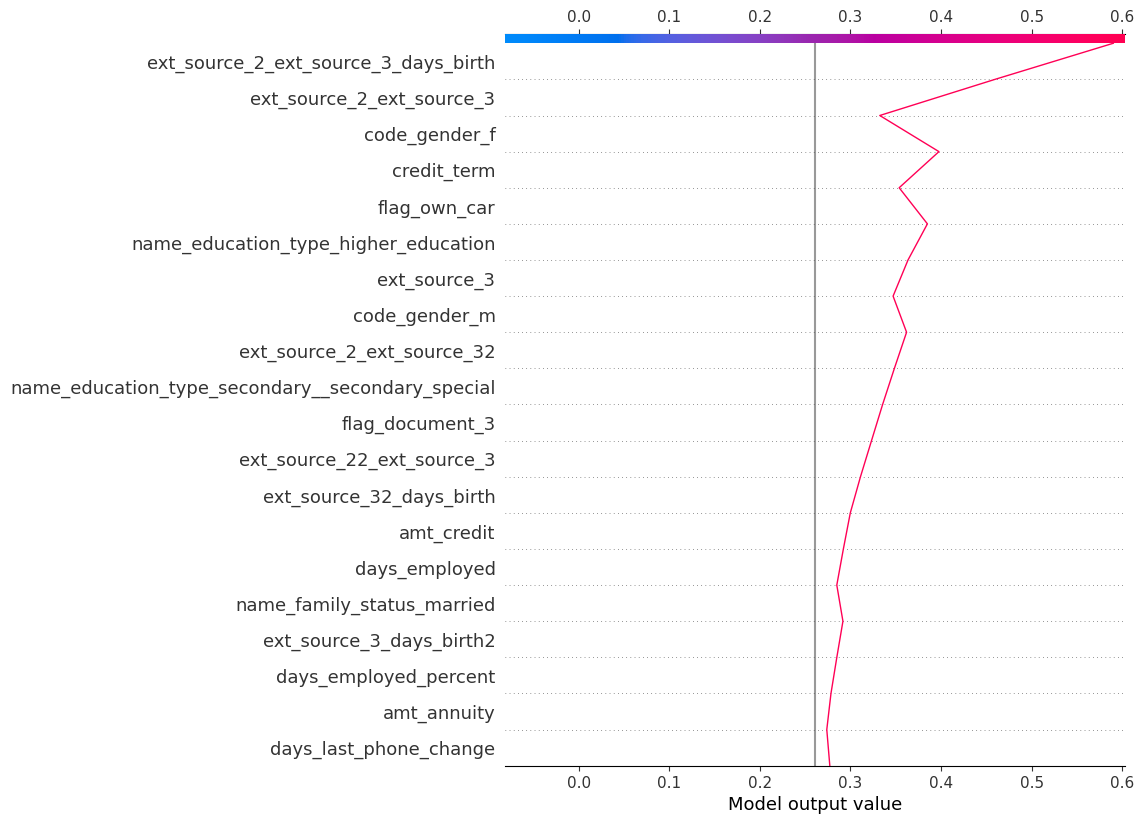

In [20]:
shap.decision_plot(shap_data['expected_value'], shap_data['shap_values'][2,:], feature_names=data_woIndex.columns.tolist())